#**1.Group Members :** 

### Hansraj - 20/49009
### Pankaj - 20/49018
### Aadarsh - 20/49051

# **2.Home Loan Approval**
**Source** : [https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval)

**DESCRIPTION** : There are 12 attributes(Columns) and 1 classification attributes having 2 classes((Y=1), (N=0)) and 614 records/instances.

**From the above dataset we predict the Loan-Status of a Person**

## **Attributes** :

**Loan_ID** - Unique Id for particular applied Loan

**Gender** - Applicant's Gender

**Married** -  Applicant's marital status

**Dependents** - Number of dependents

**Education** - Applicant's qualification

**self_Employed** - Applicant's Employeed or not

**ApplicantIncome** - Applicant's income

**CoapplicantIncome** - Co-Applicant's	

**LoanAmount** - Amount for Loan

**Loan_Amount_Term** - Loan-Amount Term	

**Credit_History** - Applicant's credit-History

**Property_Area** - Applicant's Property-Area

**Loan_Status** - Applicant's Loan Status(Y/N)

# **3. Exploratory Data Analysis**

In [447]:
#Importing and printing dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("loan_sanction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [448]:
#Columns
print("The Columns are : ")
df.columns

The Columns are : 


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [449]:
#Descibing the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [451]:
#Dimensionality of dataset
print("Dimension of the dataset :",df.ndim)
print("Shape of the dataset :",df.shape)

Dimension of the dataset : 2
Shape of the dataset : (614, 13)


In [452]:
#Numerical Features
numerical_features = df.select_dtypes(include=['float','int']).columns.tolist()
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [453]:
#Categorical Features
categorical_features = df.select_dtypes(exclude=['float','int']).columns.tolist()
categorical_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [454]:
#Performing Label Encoding
from sklearn.preprocessing import LabelEncoder
Loan_ID_label=LabelEncoder()
Gender_label=LabelEncoder()
Married_label=LabelEncoder()
Dependents_label=LabelEncoder()
Education_label=LabelEncoder()
Self_Employed_label=LabelEncoder()
Property_Area_label=LabelEncoder()
Loan_Status_label=LabelEncoder()

In [455]:
# df['Loan_ID']=Loan_ID_label.fit_transform(df['Loan_ID'])
df['Gender']=Gender_label.fit_transform(df['Gender'])
df['Married']=Married_label.fit_transform(df['Married'])
df['Dependents']=Dependents_label.fit_transform(df['Dependents'])
df['Education']=Education_label.fit_transform(df['Education'])
df['Self_Employed']=Self_Employed_label.fit_transform(df['Self_Employed'])
df['Property_Area']=Property_Area_label.fit_transform(df['Property_Area'])
df['Loan_Status']=Loan_Status_label.fit_transform(df['Loan_Status'])

In [456]:
#Data-Types after Encoding
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [457]:
#Computing Null Values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [458]:
#Removing Null values for continuous variable by MEDIAN stratagy
from sklearn.impute import SimpleImputer

#IDENTIFYING AND FILLING NUMERICAL VALUES BY THE MEDIAN
num_imputer = SimpleImputer(strategy='median')

num_imputer.fit(df[numerical_features])
SimpleImputer(strategy='median')

df[numerical_features]=num_imputer.transform(df[numerical_features])


# #IDENTIFYING AND FILLING CATEGORICAL VALUES BY THE CONSTANT
# cat_imputer = SimpleImputer(strategy = 'constant', fill_value='missing')
# cat_imputer.fit(df[categorical_features])
# SimpleImputer(fill_value='missing', strategy='constant')

# df[categorical_features] = cat_imputer.transform(df[categorical_features])
# df

In [459]:
#After removing Null Values , the Null Counts
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [460]:
#DataFrame after removing Null Values
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583.0,0.0,187.0,360.0,1.0,2,1


# **4. Pre-processsing**

<ipython-input-461-ba2320c4397f>:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



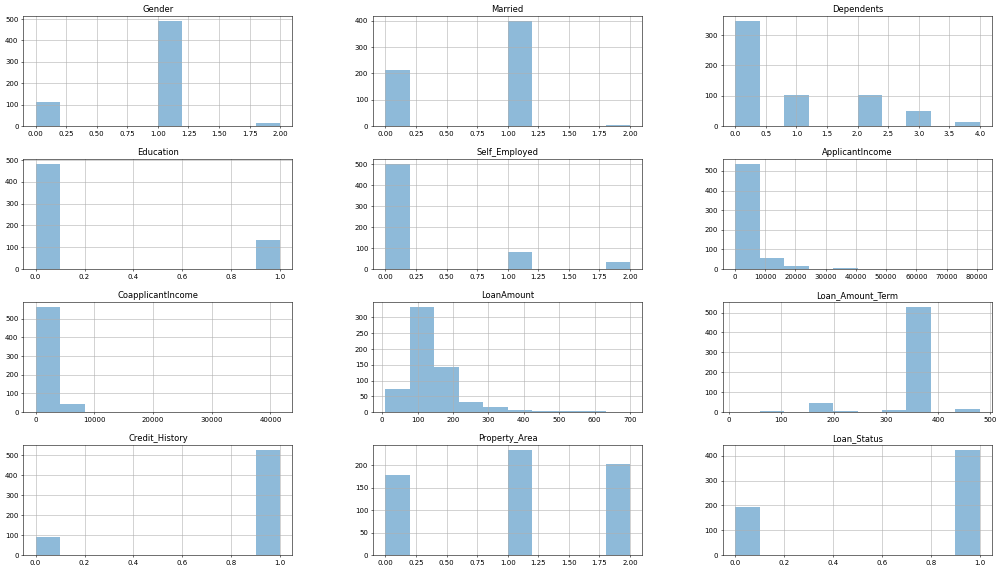

In [461]:
#Histogram plot
fig, ax = plt.subplots(figsize=(25,14), dpi=50);
df.hist(ax=ax, layout=(4,3), alpha=0.5);

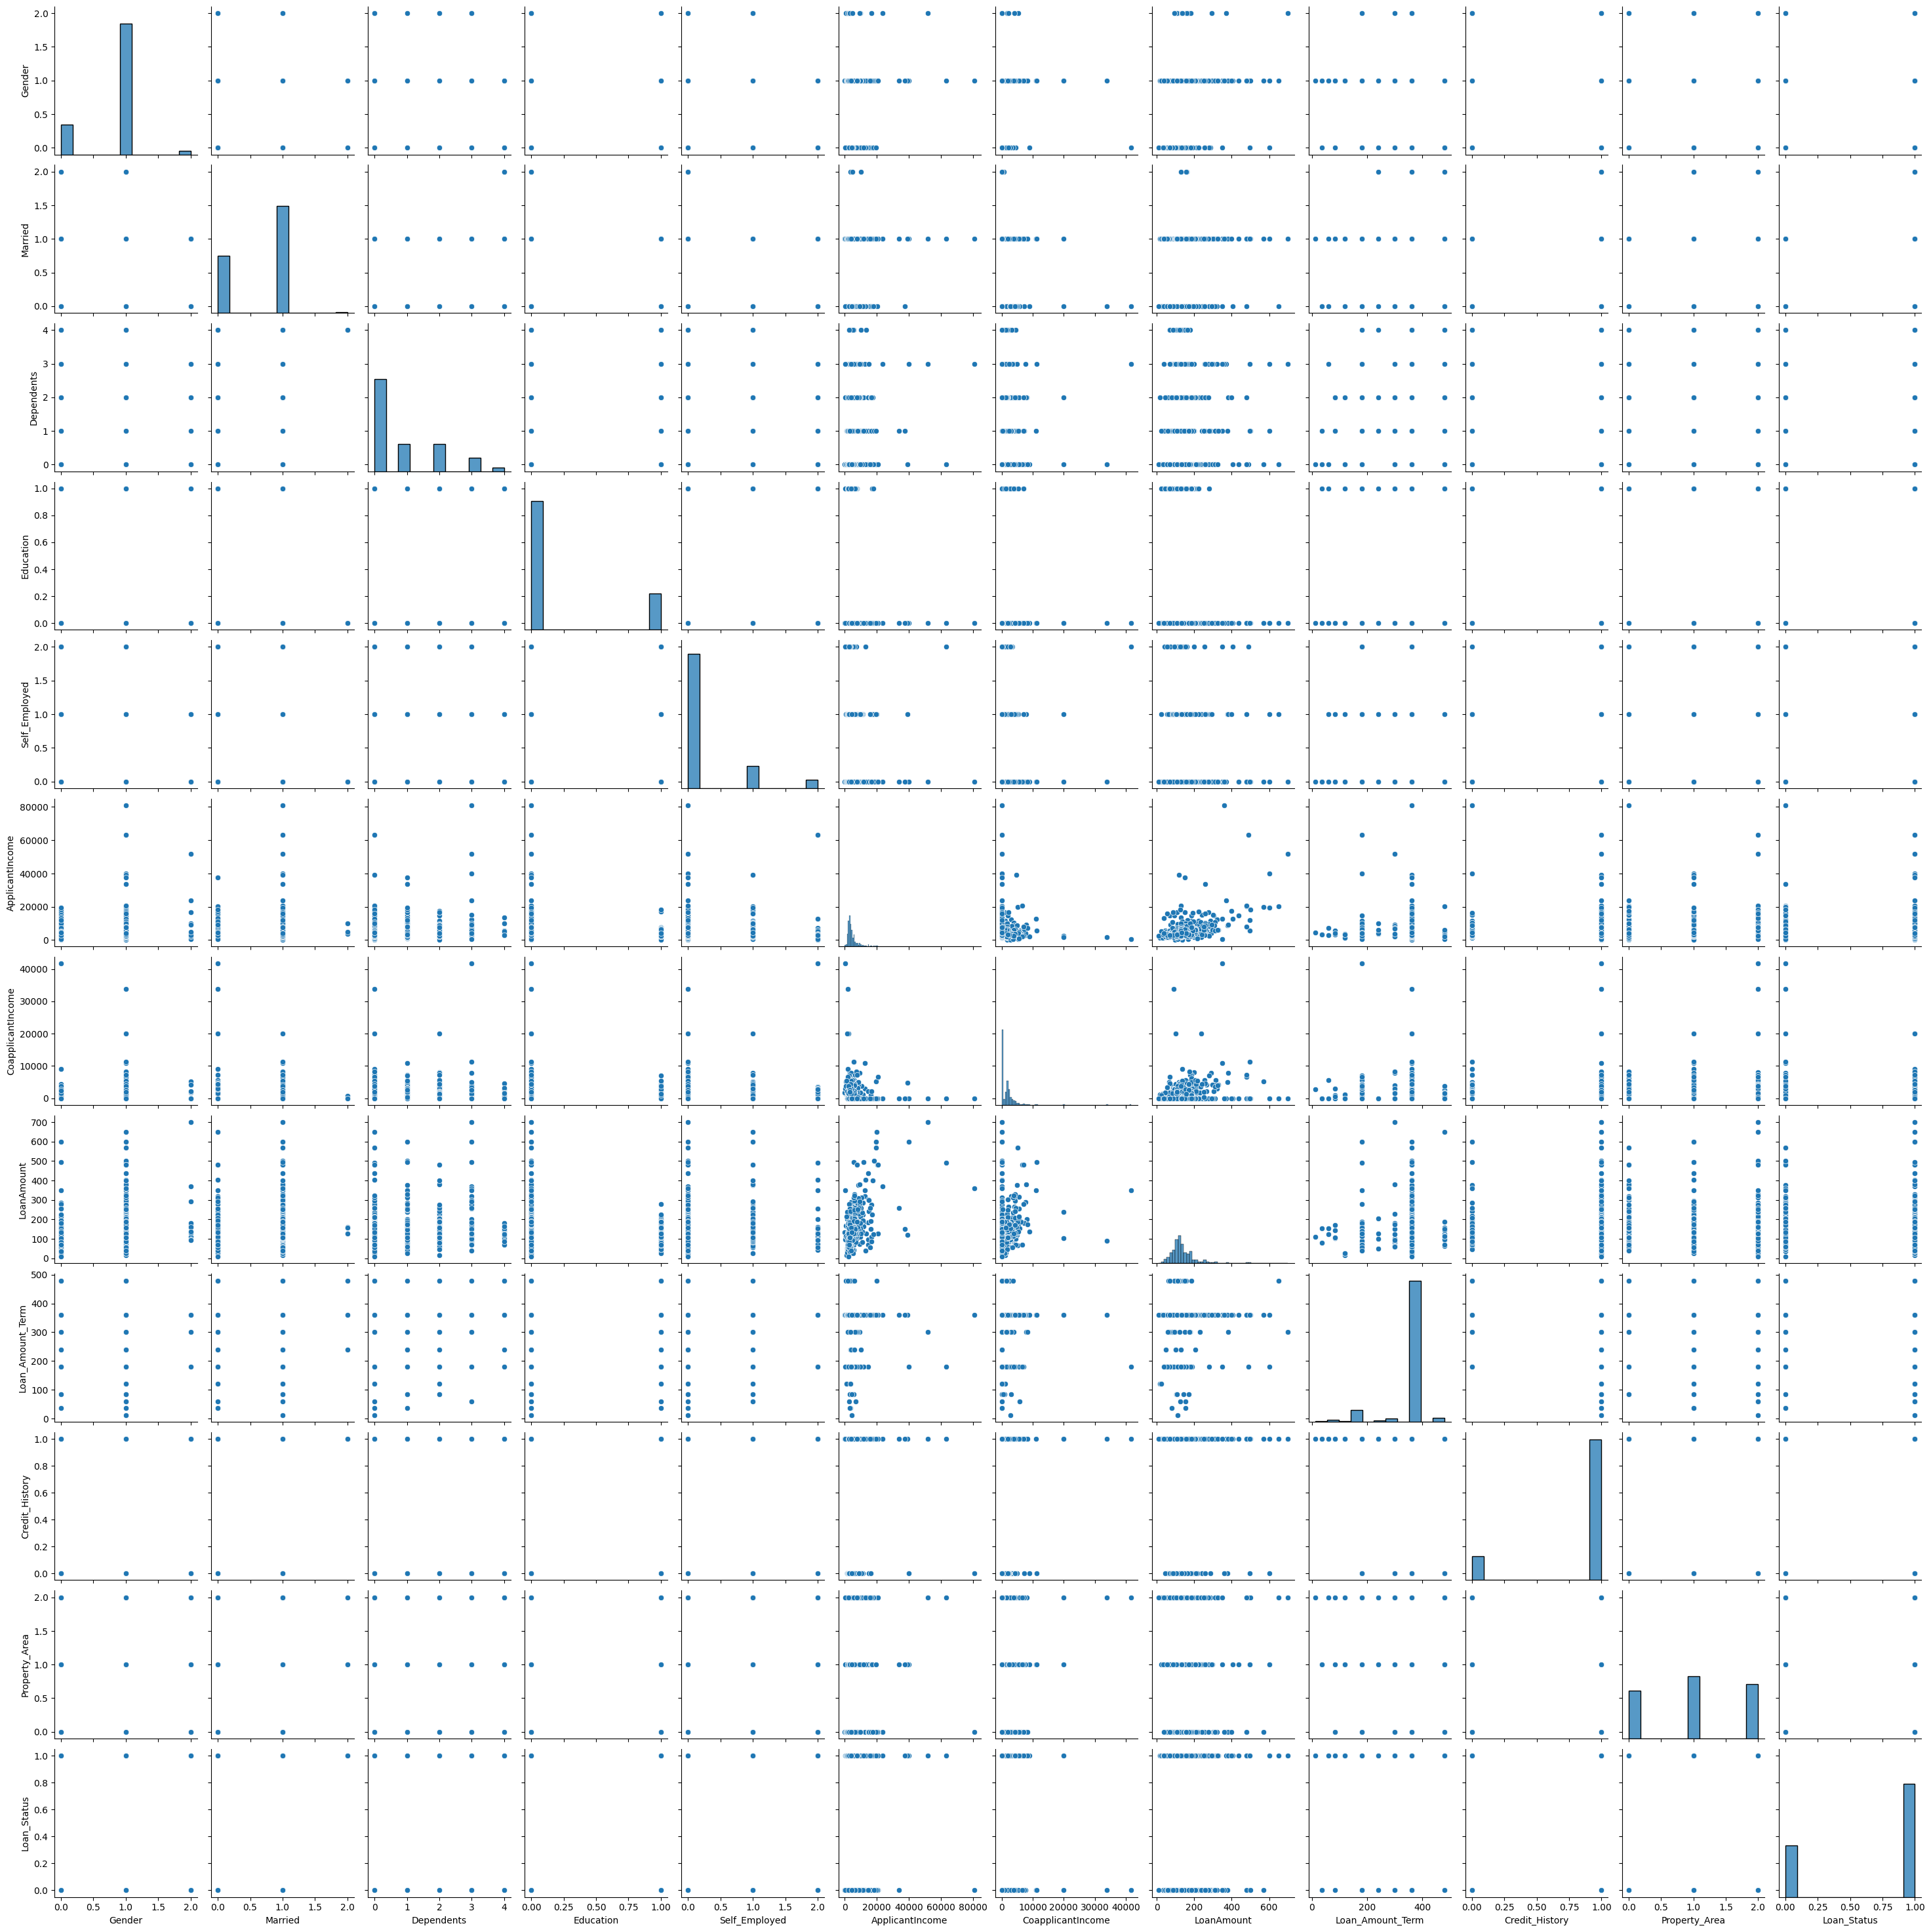

In [446]:
#Pair plot
sns.pairplot(df)

In [462]:
#Pearson's Matrix
import plotly.express as px

# df = px.data.medals_wide(indexed=True)
fig = px.imshow(df.corr(),text_auto=True,aspect="auto")
fig.show()

In [463]:
#Distinguishing featured(Independent) and dependent attributes
print(abs(df.corr()["Loan_Status"]).nlargest(6).index[1:])
features = df[df.corr()["Loan_Status"].nlargest(6).index[:10]]
dependent = df.iloc[:, -1]


Index(['Credit_History', 'Married', 'Education', 'CoapplicantIncome',
       'LoanAmount'],
      dtype='object')


In [464]:
#Featured attributes
features

,Loan_Status,Credit_History,Married,Property_Area,Self_Employed,Gender
0,1,1.0,0,2,0,1
1,0,1.0,1,0,0,1
2,1,1.0,1,2,1,1
3,1,1.0,1,2,0,1
4,1,1.0,0,2,0,1
...,...,...,...,...,...,...
609,1,1.0,0,0,0,0
610,1,1.0,1,0,0,1
611,1,1.0,1,2,0,1
612,1,1.0,1,2,0,1


In [465]:
#Dependent Variables
dependent

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [466]:
#Identifying the Outliers using Boxplot
fig = go.Figure()

for col in df:
  fig.add_trace(go.Box(y=df[col].values, name=df[col].name))
  
fig.show()


# **Featured Scaling**

In [467]:
#Performing StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(X):
    print("\nMean and Standard Deviation Before")
    print(X.mean(axis=0), X.std(axis=0))
        
    sc=StandardScaler()
    XScaled = sc.fit_transform(X)
        
    print("\nMean and Standard Deviation After")
    print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))
    return XScaled


# normalize(X)

# **Logistic Regression**

*************Normalizing the Featured/Independent Valuess*************

Mean and Standard Deviation Before
[0.68729642 0.85504886 0.65798046 1.03745928 0.23778502 0.83876221] [0.46359471 0.35205157 0.48457627 0.7868405  0.53430125 0.42140887]

Mean and Standard Deviation After
[ 0. -0.  0. -0.  0. -0.] [1. 1. 1. 1. 1. 1.]


Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [154 337]   AND  Test - [38 85] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


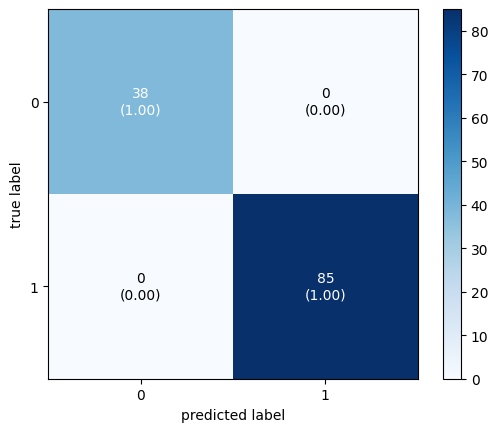



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [154 337]   AND  Test - [38 85] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


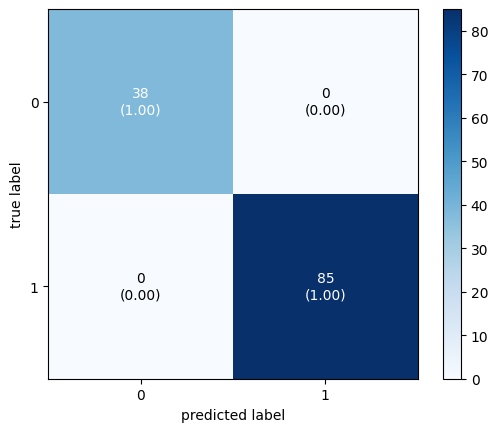



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [153 338]   AND  Test - [39 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


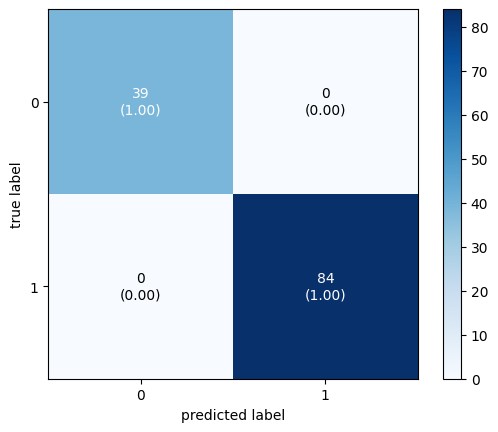



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [153 338]   AND  Test - [39 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


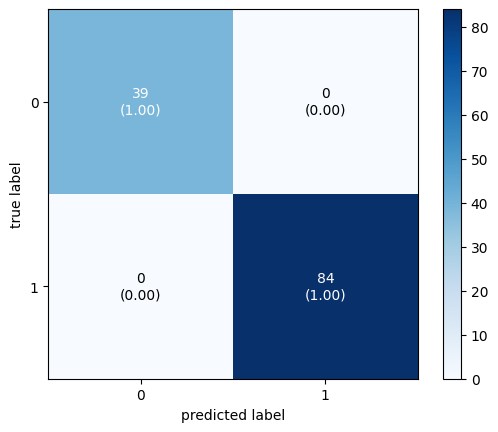



Shape of X_train - (492, 6)  AND  Shape of X_test - (122, 6)
Shape of Y_train - (492,)  AND  Shape of Y_test - (122,)

Train - [154 338]   AND  Test - [38 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


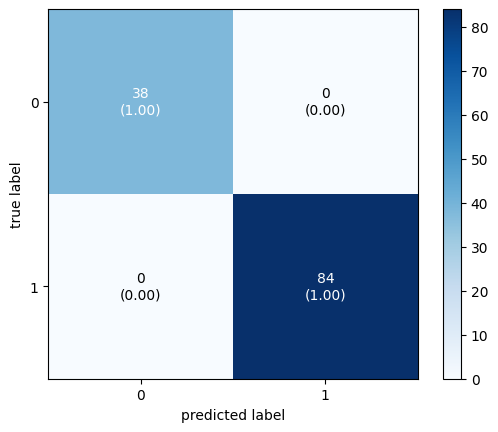

Result Of Logistic Regression: 

Average accuracy :  100.0
[[192   0]
 [  0 422]]


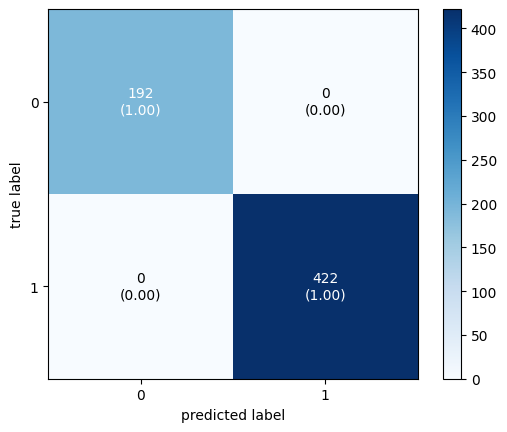

ROC_AUC_SCORE :  1.0

Classification Report : 

               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    192.0  422.0       1.0      614.0         614.0


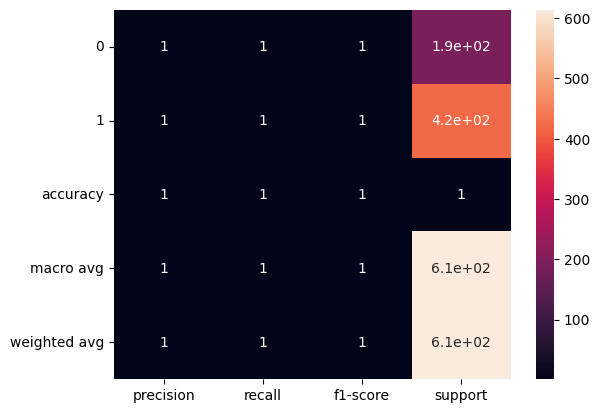

In [468]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn .metrics import roc_auc_score

def logisticRegresssion():    
    X = features.values
    # print(X)
    Y = dependent.values
    # print(Y)
    # print(type(Y))
    # Check for NaN values and replace them with mean value of the corresponding column
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    X = imp_mean.fit_transform(X)
    
    print("*************Normalizing the Featured/Independent Valuess*************")
    XScaled = normalize(X) 

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    acc = []
    y_ori = np.array([], dtype=int)
    y_pre = np.array([], dtype=int)
    net_mat = np.zeros((2,2))
    roc = []
    
    for train_index, test_index in skf.split(X,Y):
        X_train = X[train_index]
        X_test = X[test_index]
        Y_train = Y[train_index]
        Y_test = Y[test_index]
        print("\n") 
        print(f"Shape of X_train - {X_train.shape}  AND  Shape of X_test - {X_test.shape}")   
        print(f"Shape of Y_train - {Y_train.shape}  AND  Shape of Y_test - {Y_test.shape}")
        # print(f"For {i+1} fold : ")      
        print(f"\nTrain - {np.bincount(Y[train_index])}   AND  Test - {np.bincount(Y[test_index])} \n")  
        
        LRModel = LogisticRegression(max_iter=1000000)
        LRModel.fit(X_train, Y_train)
        Y_testPred = LRModel.predict(X_test)
        y_ori = np.hstack((y_ori,Y_test))
        y_pre = np.hstack((y_pre,Y_testPred))   
        testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
        print("Test Accuracy : ", testAccuracy*100)
        acc.append(testAccuracy)

        roc_score = roc_auc_score(Y_test, LRModel.predict_proba(X_test)[:, 1], multi_class='ovr')
        print("ROC_AUC_SCORE : ",roc_score)  

        matrix1 = confusion_matrix(Y_test, Y_testPred)
        net_mat = net_mat+matrix1
        plot_confusion_matrix(matrix1,show_normed=True, colorbar=True, show_absolute=True)   
        plt.show()
        
    print("Result Of Logistic Regression: \n")
    avg_accuracy = (sum(acc) / len(acc))*100
    print("Average accuracy : ", avg_accuracy)        
    net_mat = net_mat.astype('int')
    print(net_mat)
    plot_confusion_matrix(net_mat, show_normed=True, colorbar=True, show_absolute=True, cmap='Blues')   
    plt.show()
    # print(X_test.shape,Y_test.shape)
    # print(LRModel.predict_proba(X_test))
    # roc_score = roc_auc_score(Y_test, LRModel.predict_proba(X_test), multi_class='ovr')
    # roc_score = roc_auc_score(Y_test.ravel(), LRModel.predict_proba(X_test), multi_class='ovr')
    roc_score = roc_auc_score(Y_test, LRModel.predict_proba(X_test)[:, 1], multi_class='ovo')

    print("ROC_AUC_SCORE : ",roc_score)
    print("\nClassification Report : \n")
    report = classification_report(y_ori, y_pre, output_dict=True)
    report_Df = pd.DataFrame(report)
    print(report_Df)
    sns.heatmap(report_Df.T,annot=True)
    avg_accuracy

logisticRegresssion()

# **Decision Tree Classifier**

*************Normalizing the Featured/Independent Valuess*************

Mean and Standard Deviation Before
[0.68729642 0.85504886 0.65798046 1.03745928 0.23778502 0.83876221] [0.46359471 0.35205157 0.48457627 0.7868405  0.53430125 0.42140887]

Mean and Standard Deviation After
[ 0. -0.  0. -0.  0. -0.] [1. 1. 1. 1. 1. 1.]


Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [154 337]   AND  Test - [38 85] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


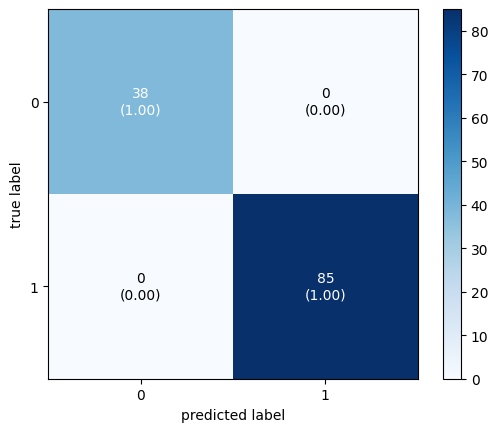



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [154 337]   AND  Test - [38 85] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


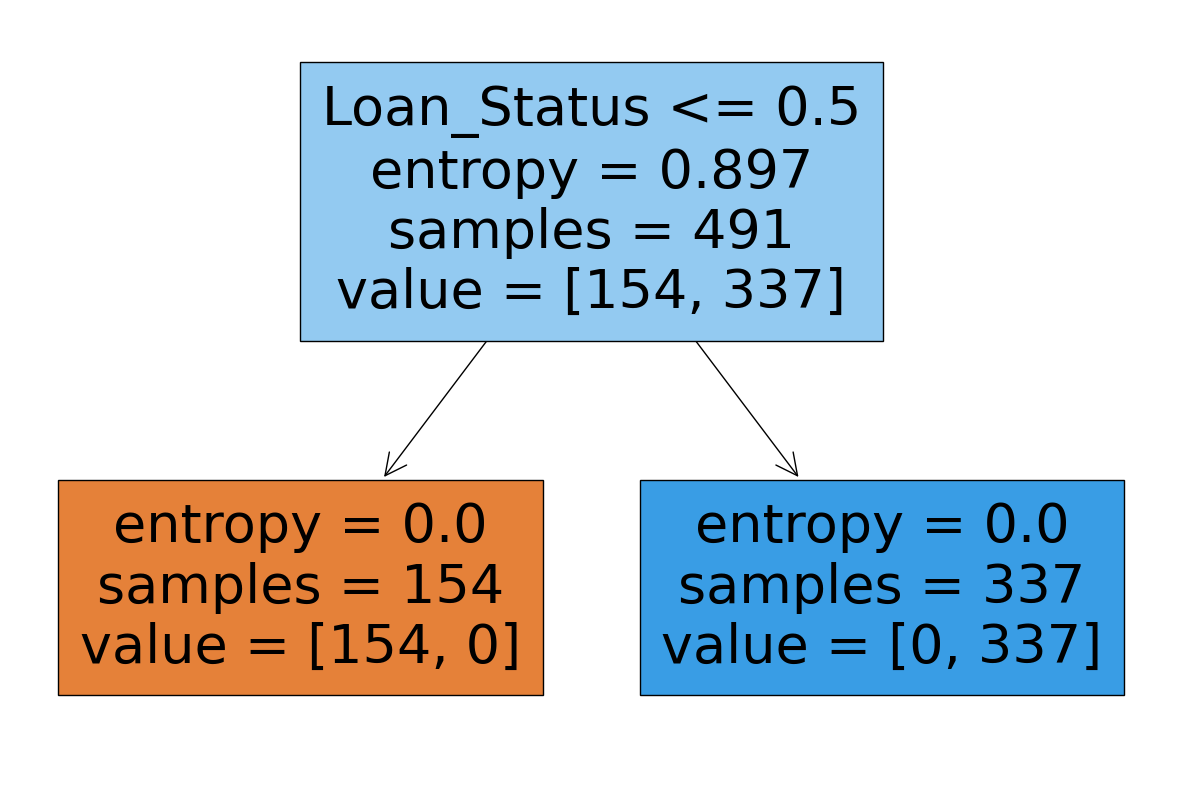

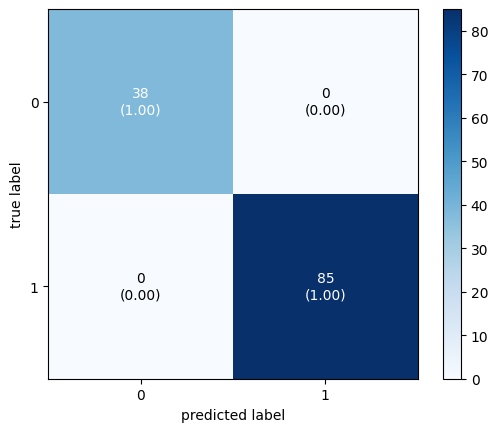



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [153 338]   AND  Test - [39 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


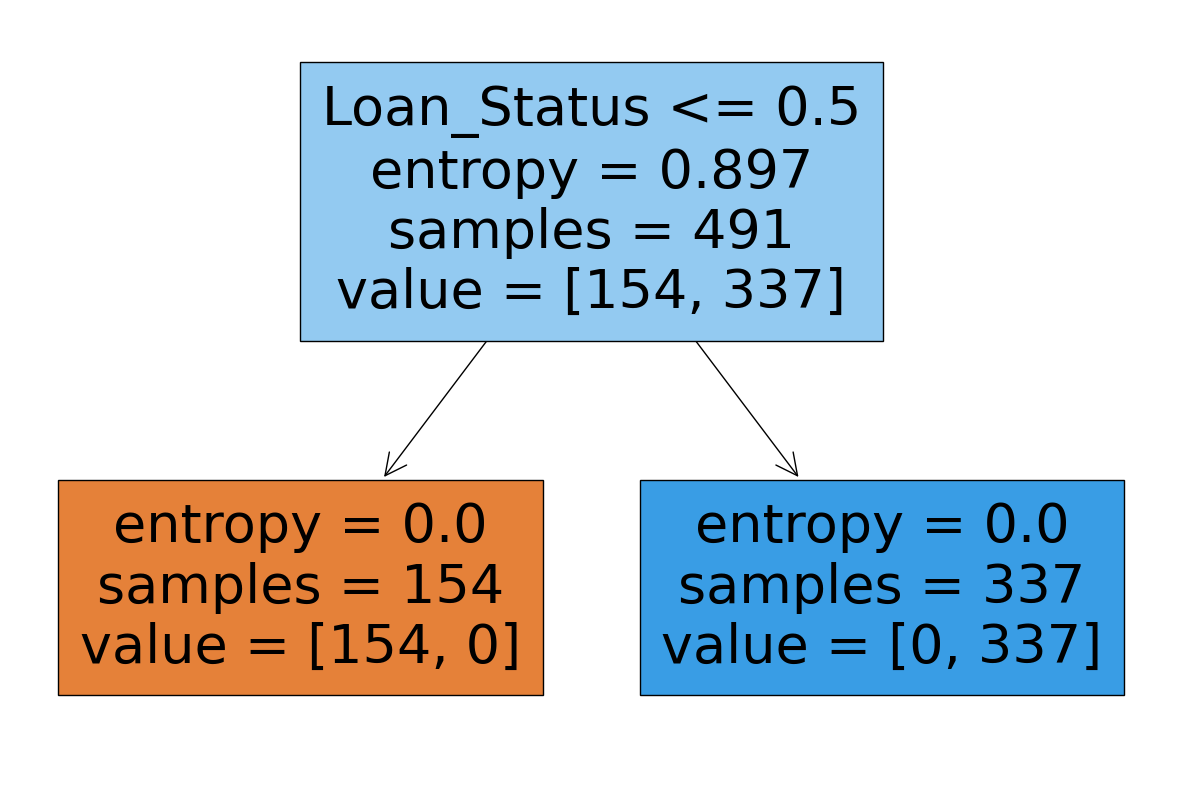

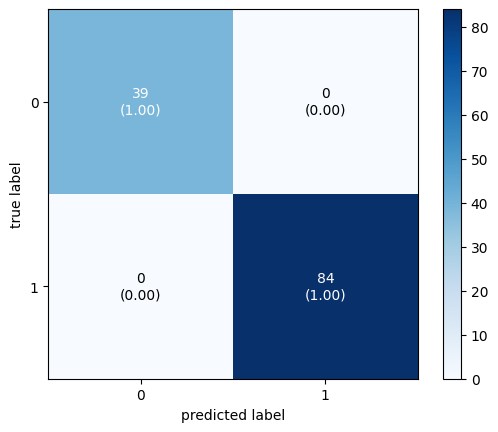



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [153 338]   AND  Test - [39 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


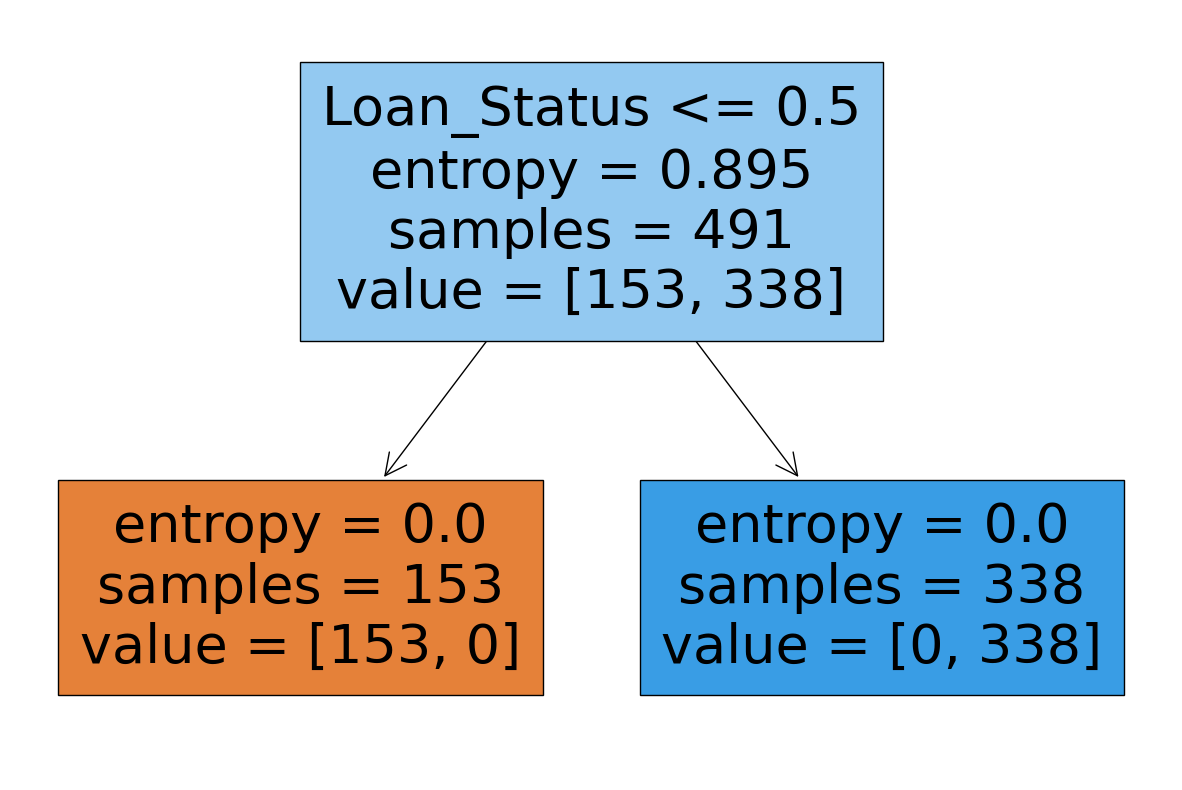

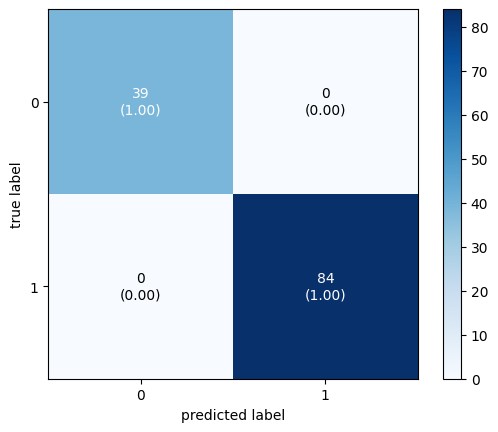



Shape of X_train - (492, 6)  AND  Shape of X_test - (122, 6)
Shape of Y_train - (492,)  AND  Shape of Y_test - (122,)

Train - [154 338]   AND  Test - [38 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


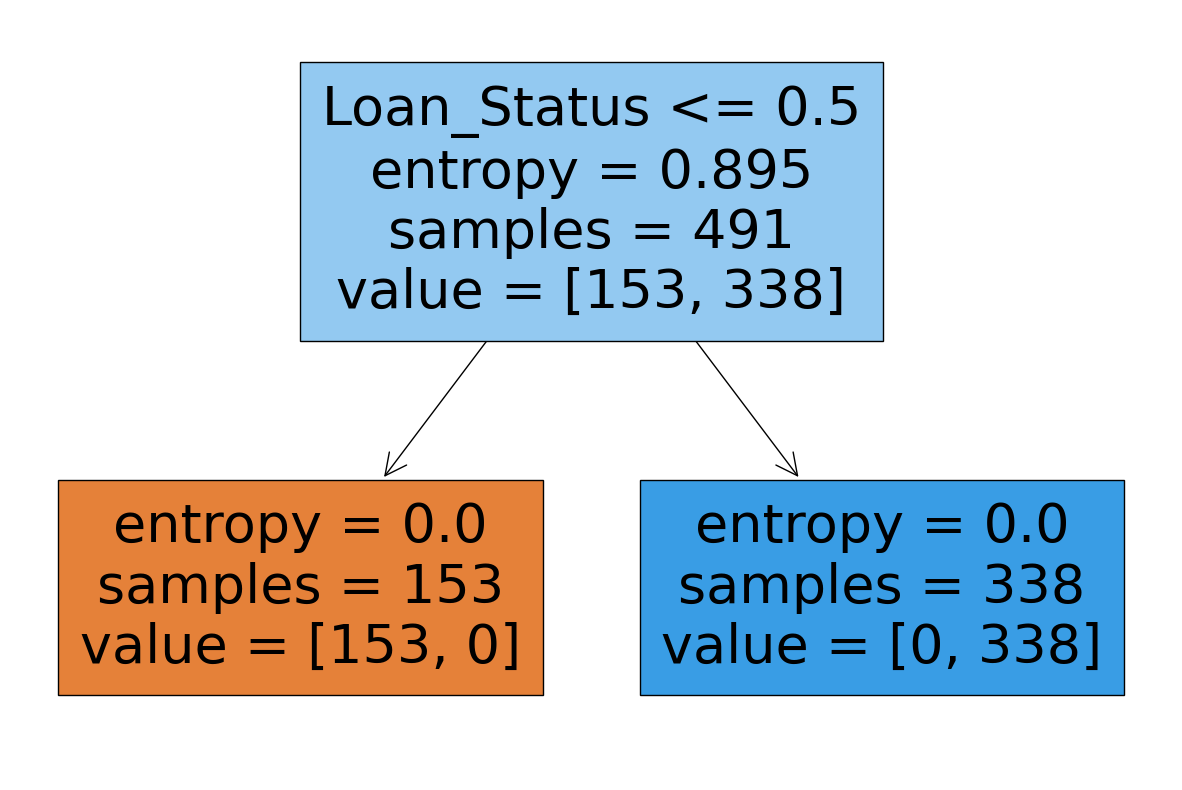

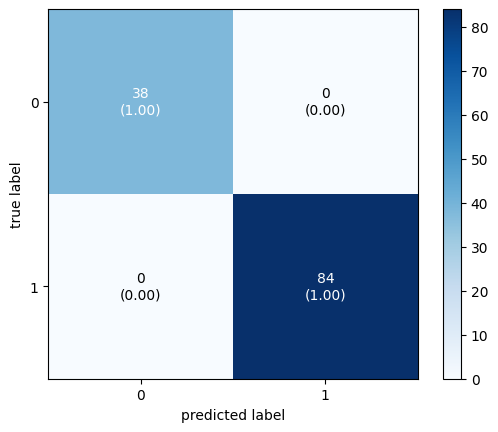

Result Of  Decisiom Tree : 

Average accuracy :  100.0
[[192   0]
 [  0 422]]


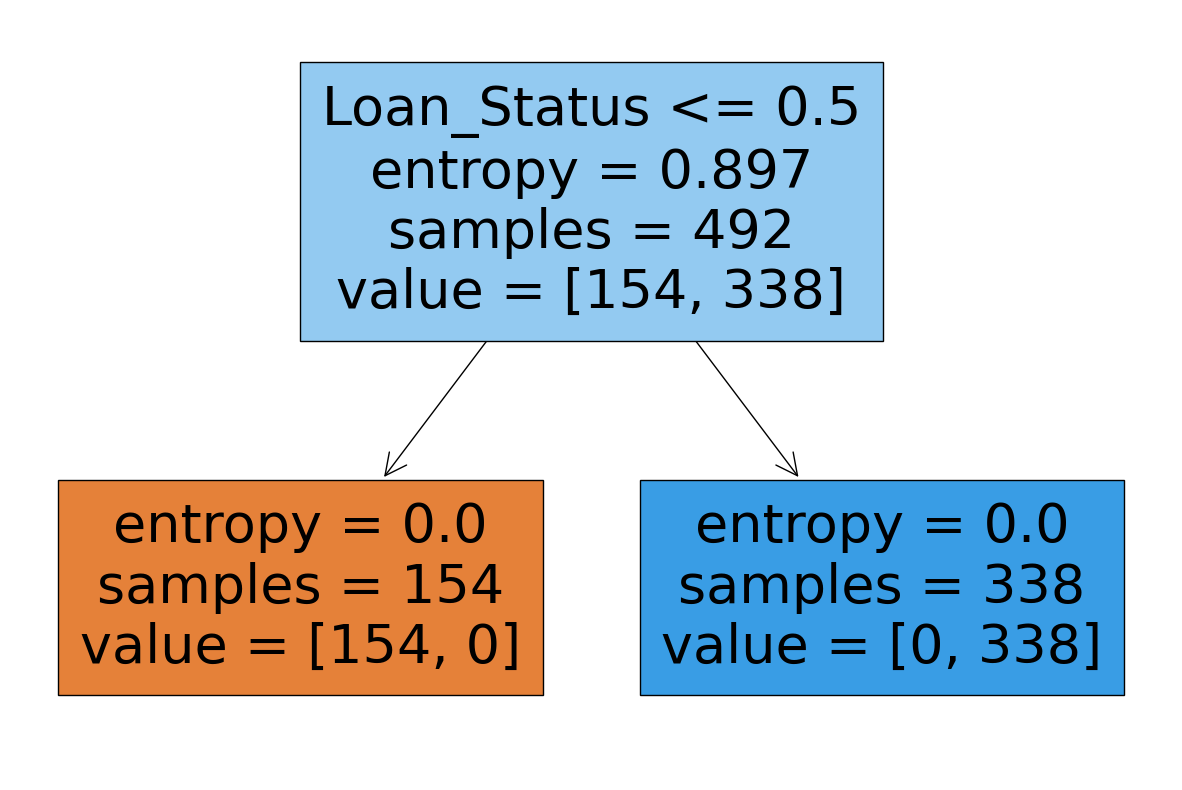

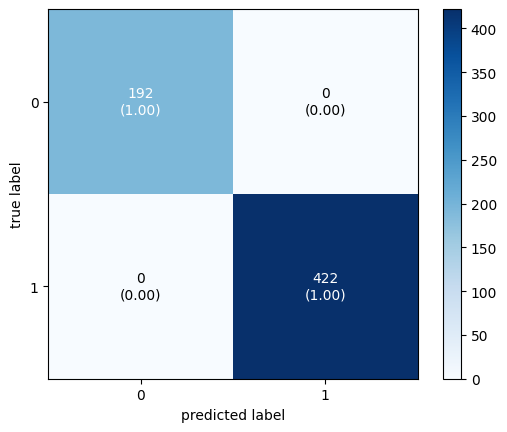

ROC_AUC_SCORE :  1.0

Classification Report : 

               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    192.0  422.0       1.0      614.0         614.0


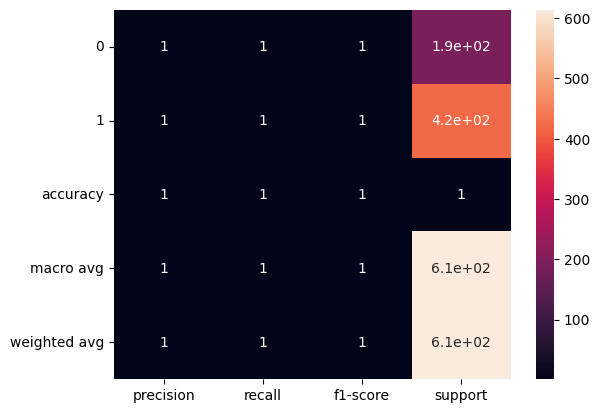

In [469]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

def decisionTree():
  X=features.values
  Y=dependent.values
  # Check for NaN values and replace them with mean value of the corresponding column
  imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  X = imp_mean.fit_transform(X)
  print("*************Normalizing the Featured/Independent Valuess*************")
  XScaled = normalize(X) 

  skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
  acc=[]

  y_ori = np.array([], dtype=int)

  y_pre= np.array([], dtype=int)
  net_mat=np.zeros((2,2))
  
  for train_index, test_index in skf.split(X,Y):
      
      X_train=X[train_index]
      X_test=X[test_index]
      Y_train=Y[train_index]
      Y_test=Y[test_index]

      print("\n") 
      print(f"Shape of X_train - {X_train.shape}  AND  Shape of X_test - {X_test.shape}")   
      print(f"Shape of Y_train - {Y_train.shape}  AND  Shape of Y_test - {Y_test.shape}")
      # print(f"For {i+1} fold : ")      
      print(f"\nTrain - {np.bincount(Y[train_index])}   AND  Test - {np.bincount(Y[test_index])} \n")

      treemodel=DecisionTreeClassifier(criterion='entropy',max_depth=4)
      treemodel.fit(X_train, Y_train)

      Y_testPred =treemodel.predict(X_test)

      y_ori=np.hstack((y_ori,Y_test))
      
  
      y_pre=np.hstack((y_pre,Y_testPred))   
      testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
      print("Test Accuracy : ", testAccuracy*100)
      acc.append(testAccuracy)

      roc_score=roc_auc_score(Y_test, treemodel.predict_proba(X_test)[:, 1], multi_class='ovr')

      print("ROC_AUC_SCORE : ",roc_score)
     

      matrix1= confusion_matrix(Y_test, Y_testPred)
      #      sum of the total confusion matirx
      net_mat=net_mat+matrix1
     
      
      plot_confusion_matrix(matrix1,show_normed=True, colorbar=True, show_absolute=True)   
      
      plt.show()
      
      plt.figure(figsize=(15,10))
      tree.plot_tree(treemodel,feature_names=features.columns,filled=True)
      
    
  print("Result Of  Decisiom Tree : \n")
  avg_accuracy=(sum(acc) / len(acc))*100
  print("Average accuracy : ",avg_accuracy )     

  net_mat = net_mat.astype('int')
  print(net_mat)
  plot_confusion_matrix(net_mat,show_normed=True, colorbar=True, show_absolute=True, cmap='Blues')   

  plt.show()
   
  roc_score=roc_auc_score(Y, treemodel.predict_proba(X)[:, 1], multi_class='ovr')
  print("ROC_AUC_SCORE : ",roc_score)
 
  print("\nClassification Report : \n")
  report=classification_report(y_ori, y_pre,output_dict=True)
  report_Df=pd.DataFrame(report)
  print(report_Df)
  sns.heatmap(report_Df.T,annot=True)
  avg_accuracy

decisionTree()

# **Gaussian Naive Bayes Classifier**

*************Normalizing the Featured/Independent Valuess*************

Mean and Standard Deviation Before
[0.68729642 0.85504886 0.65798046 1.03745928 0.23778502 0.83876221] [0.46359471 0.35205157 0.48457627 0.7868405  0.53430125 0.42140887]

Mean and Standard Deviation After
[ 0. -0.  0. -0.  0. -0.] [1. 1. 1. 1. 1. 1.]


Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [154 337]   AND  Test - [38 85] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


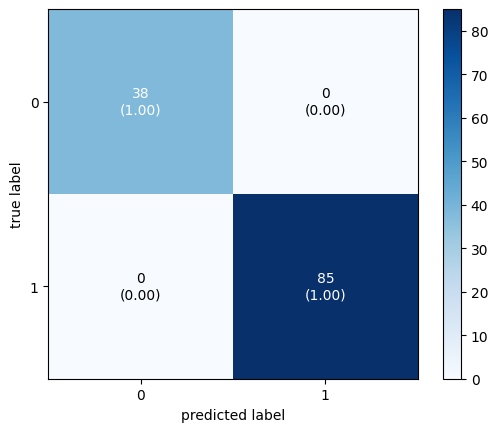



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [154 337]   AND  Test - [38 85] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


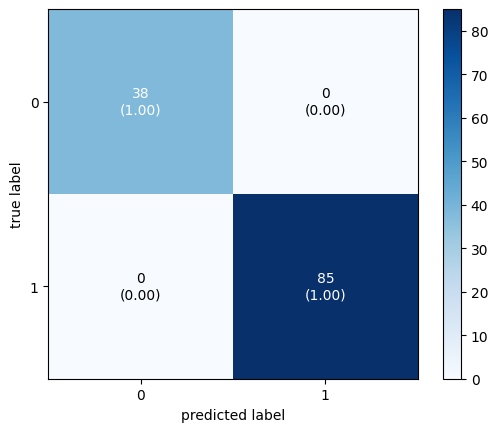



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [153 338]   AND  Test - [39 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


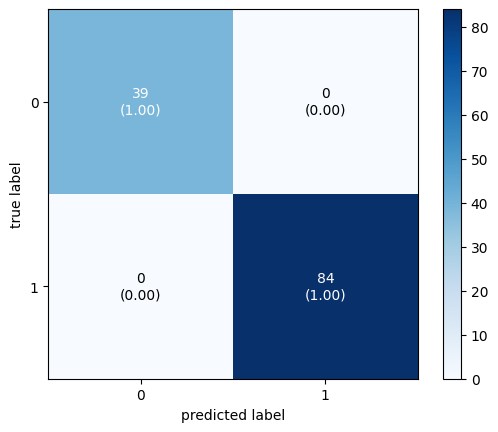



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [153 338]   AND  Test - [39 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


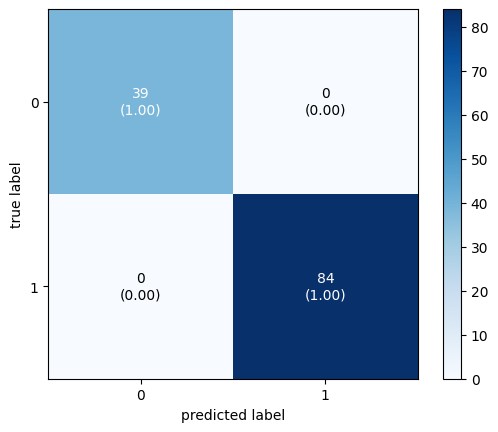



Shape of X_train - (492, 6)  AND  Shape of X_test - (122, 6)
Shape of Y_train - (492,)  AND  Shape of Y_test - (122,)

Train - [154 338]   AND  Test - [38 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


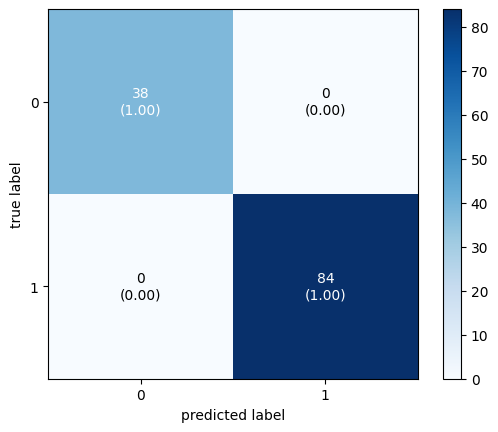

Result Of Gaussian Naive Bayes Classifier : 

Naive Bayes score :  1.0
Average accuracy :  100.0
[[192   0]
 [  0 422]]


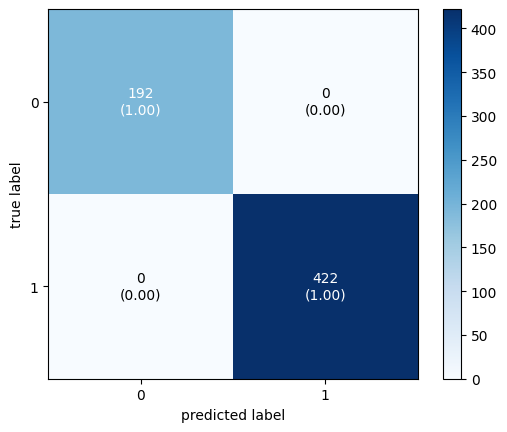

ROC_AUC_SCORE :  1.0

Classification Report : 

               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    192.0  422.0       1.0      614.0         614.0


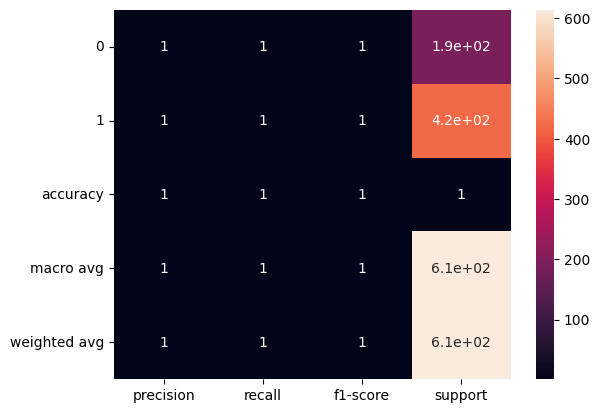

In [470]:
from sklearn.naive_bayes import GaussianNB
def gaussianNaiveBayes():
  X=features.values
  Y=dependent.values
  # Check for NaN values and replace them with mean value of the corresponding column
  imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  X = imp_mean.fit_transform(X)
  print("*************Normalizing the Featured/Independent Valuess*************")
  XScaled = normalize(X) 

  skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
  acc=[]

  y_ori = np.array([], dtype=int)

  y_pre= np.array([], dtype=int)
  net_mat=np.zeros((2,2))
  for train_index, test_index in skf.split(X,Y):
      
      X_train=X[train_index]
      X_test=X[test_index]
      Y_train=Y[train_index]
      Y_test=Y[test_index]

      print("\n") 
      print(f"Shape of X_train - {X_train.shape}  AND  Shape of X_test - {X_test.shape}")   
      print(f"Shape of Y_train - {Y_train.shape}  AND  Shape of Y_test - {Y_test.shape}")
      # print(f"For {i+1} fold : ")      
      print(f"\nTrain - {np.bincount(Y[train_index])}   AND  Test - {np.bincount(Y[test_index])} \n")

      GN = GaussianNB()
      GN.fit(X_train, Y_train)
      Y_testPred = GN.predict(X_test)
      
      y_ori=np.hstack((y_ori,Y_test))
      
  
      y_pre=np.hstack((y_pre,Y_testPred))
       
      testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
      print("Test Accuracy : ", testAccuracy*100)
      acc.append(testAccuracy)

      roc_score=roc_auc_score(Y_test, GN.predict_proba(X_test)[:, 1], multi_class='ovr')

      print("ROC_AUC_SCORE : ",roc_score)   

      matrix1= confusion_matrix(Y_test, Y_testPred)
      #      sum of the total confusion matirx
      net_mat=net_mat+matrix1
     
      
      plot_confusion_matrix(matrix1,show_normed=True, colorbar=True, show_absolute=True)   
      
      plt.show()
  print("Result Of Gaussian Naive Bayes Classifier : \n")
  print("Naive Bayes score : ",GN.score(X_test, Y_testPred))
  avg_accuracy= (sum(acc) / len(acc))*100
  print("Average accuracy : ", avg_accuracy)   

  net_mat = net_mat.astype('int')
  print(net_mat)
  plot_confusion_matrix(net_mat,show_normed=True, colorbar=True, show_absolute=True, cmap='Blues')   

  plt.show()
   
  roc_score=roc_auc_score(Y,GN.predict_proba(X)[:, 1], multi_class='ovr')
  print("ROC_AUC_SCORE : ",roc_score)
 
  
  
  print("\nClassification Report : \n")
  report=classification_report(y_ori, y_pre,output_dict=True)
  report_Df=pd.DataFrame(report)
  print(report_Df)
  sns.heatmap(report_Df.T,annot=True)
  avg_accuracy

gaussianNaiveBayes()

# **K- Nearest  Neighbour classifier**

*************Normalizing the Featured/Independent Valuess*************

Mean and Standard Deviation Before
[0.68729642 0.85504886 0.65798046 1.03745928 0.23778502 0.83876221] [0.46359471 0.35205157 0.48457627 0.7868405  0.53430125 0.42140887]

Mean and Standard Deviation After
[ 0. -0.  0. -0.  0. -0.] [1. 1. 1. 1. 1. 1.]


Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [154 337]   AND  Test - [38 85] 

Test Accuracy :  99.1869918699187
ROC_AUC_SCORE :  1.0


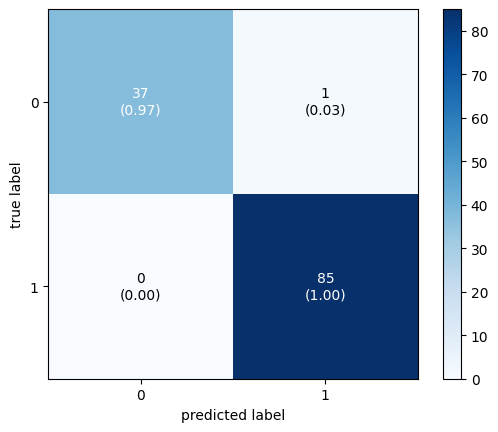



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [154 337]   AND  Test - [38 85] 

Test Accuracy :  98.3739837398374
ROC_AUC_SCORE :  1.0


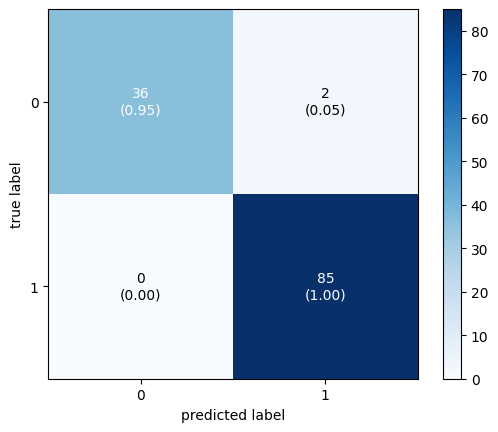



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [153 338]   AND  Test - [39 84] 

Test Accuracy :  99.1869918699187
ROC_AUC_SCORE :  1.0


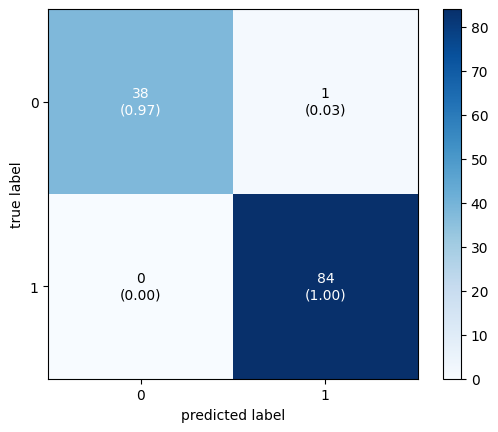



Shape of X_train - (491, 6)  AND  Shape of X_test - (123, 6)
Shape of Y_train - (491,)  AND  Shape of Y_test - (123,)

Train - [153 338]   AND  Test - [39 84] 

Test Accuracy :  98.3739837398374
ROC_AUC_SCORE :  0.9999999999999999


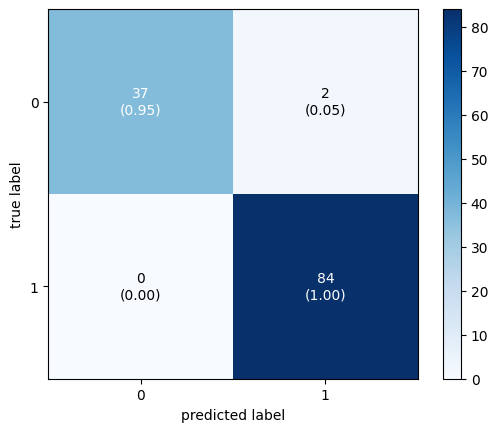



Shape of X_train - (492, 6)  AND  Shape of X_test - (122, 6)
Shape of Y_train - (492,)  AND  Shape of Y_test - (122,)

Train - [154 338]   AND  Test - [38 84] 

Test Accuracy :  100.0
ROC_AUC_SCORE :  1.0


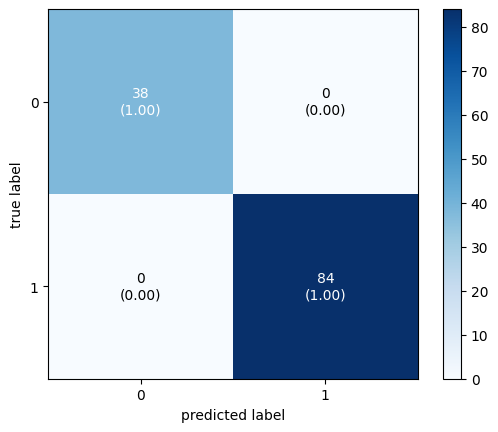

Average accuracy :  99.02439024390245
[[186   6]
 [  0 422]]


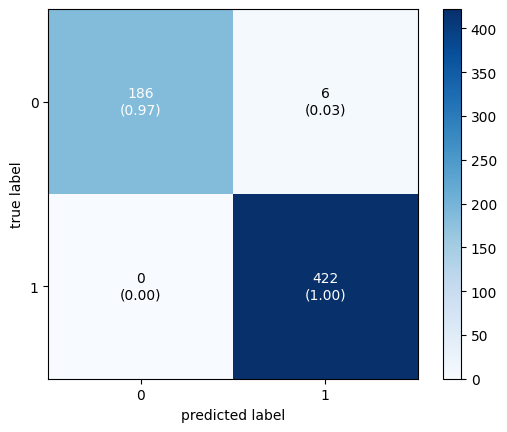

ROC_AUC_SCORE :  1.0

Classification Report : 

                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.985981  0.990228    0.992991      0.990365
recall       0.968750    1.000000  0.990228    0.984375      0.990228
f1-score     0.984127    0.992941  0.990228    0.988534      0.990185
support    192.000000  422.000000  0.990228  614.000000    614.000000


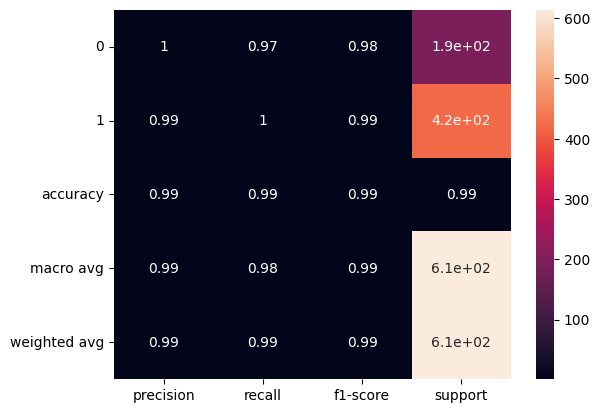

In [471]:
from sklearn.neighbors import KNeighborsClassifier
def kNearestNeighbour():
  X=features.values
  Y=dependent.values
  # Check for NaN values and replace them with mean value of the corresponding column
  imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  X = imp_mean.fit_transform(X)
  print("*************Normalizing the Featured/Independent Valuess*************")
  XScaled = normalize(X) 

  skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
  acc=[]

  y_ori = np.array([], dtype=int)

  y_pre= np.array([], dtype=int)
  net_mat=np.zeros((2,2))
  for train_index, test_index in skf.split(X,Y):
      
      X_train=X[train_index]
      X_test=X[test_index]
      Y_train=Y[train_index]
      Y_test=Y[test_index] 

      print("\n") 
      print(f"Shape of X_train - {X_train.shape}  AND  Shape of X_test - {X_test.shape}")   
      print(f"Shape of Y_train - {Y_train.shape}  AND  Shape of Y_test - {Y_test.shape}")
      # print(f"For {i+1} fold : ")      
      print(f"\nTrain - {np.bincount(Y[train_index])}   AND  Test - {np.bincount(Y[test_index])} \n")

      Kn = KNeighborsClassifier(n_neighbors=10)
      Kn.fit(X_train, Y_train)
      Y_testPred = Kn.predict(X_test)

      y_ori=np.hstack((y_ori,Y_test))
      
  
      y_pre=np.hstack((y_pre,Y_testPred))
       
      testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
      
      
      print("Test Accuracy : ", testAccuracy*100)
      acc.append(testAccuracy)

      roc_score=roc_auc_score(Y_test, Kn.predict_proba(X_test)[:, 1], multi_class='ovr')

      print("ROC_AUC_SCORE : ",roc_score)
    

      matrix1= confusion_matrix(Y_test, Y_testPred)
      # sum of the total confusion matirx
      net_mat=net_mat+matrix1
     
      
      plot_confusion_matrix(matrix1,show_normed=True, colorbar=True, show_absolute=True)   
      
      plt.show()
  avg_accuracy=(sum(acc) / len(acc))*100
  print("Average accuracy : ", avg_accuracy)      

  net_mat = net_mat.astype('int')
  print(net_mat)
  plot_confusion_matrix(net_mat,show_normed=True, colorbar=True, show_absolute=True, cmap='Blues')   

  plt.show()
   
  roc_score=roc_auc_score(Y,Kn.predict_proba(X)[:, 1], multi_class='ovr')
  print("ROC_AUC_SCORE : ",roc_score)
 
 
  
  print("\nClassification Report : \n")
  report=classification_report(y_ori, y_pre,output_dict=True)
  report_Df=pd.DataFrame(report)
  print(report_Df)
  sns.heatmap(report_Df.T,annot=True)
  avg_accuracy

kNearestNeighbour()